In [7]:
import xarray as xr

In [8]:
nemo = xr.open_dataset('/home/bruno/git/pnas/nemo_data/cmems_2014_2023_temp.nc')
nemo = nemo.reindex()
nemo.close()

1. Explorar as Dimensões e Coordenadas
Verifique as dimensões e coordenadas principais dos arquivos:

In [10]:
print(nemo.dims)
print(nemo.coords)


Frozen({'depth': 25, 'latitude': 85, 'longitude': 120, 'time': 342})
Coordinates:
  * depth      (depth) float32 0.494 1.541 2.646 3.819 ... 109.7 130.7 155.9
  * latitude   (latitude) float32 -28.0 -27.92 -27.83 ... -21.17 -21.08 -21.0
  * longitude  (longitude) float32 -50.0 -49.92 -49.83 ... -40.25 -40.17 -40.08
  * time       (time) datetime64[ns] 1993-01-01 1993-02-01 ... 2021-06-01


2. Verificar a Série Temporal
Confira as datas disponíveis

In [11]:
print(nemo['time'])


<xarray.DataArray 'time' (time: 342)>
array(['1993-01-01T00:00:00.000000000', '1993-02-01T00:00:00.000000000',
       '1993-03-01T00:00:00.000000000', ..., '2021-04-01T00:00:00.000000000',
       '2021-05-01T00:00:00.000000000', '2021-06-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1993-01-01 1993-02-01 ... 2021-06-01
Attributes:
    standard_name:  time
    long_name:      Time
    axis:           T


In [13]:
#Para verificar intervalos:

print(nemo['time'].min().values)
print(nemo['time'].max().values)


1993-01-01T00:00:00.000000000
2021-06-01T00:00:00.000000000


4. Explorar as Variáveis
Liste as variáveis disponíveis:

In [18]:
print(nemo.data_vars)


Data variables:
    mlotst   (time, latitude, longitude) float32 ...
    so       (time, depth, latitude, longitude) float32 ...
    thetao   (time, depth, latitude, longitude) float32 ...


5. Visualização de Dados
Plote um gráfico simples para ver as variações temporais:

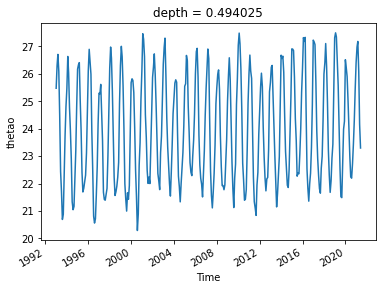

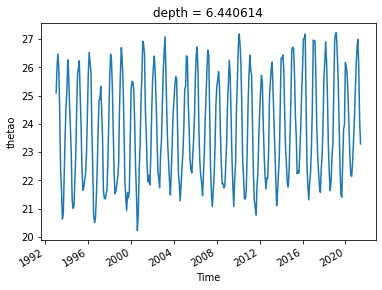

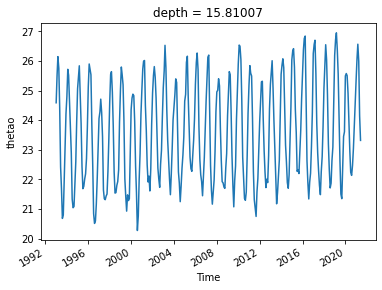

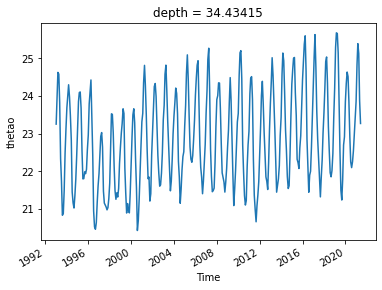

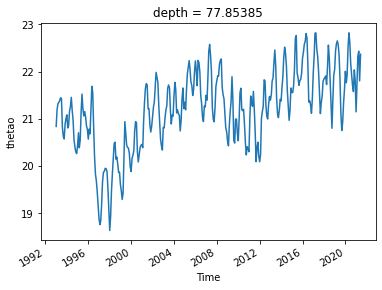

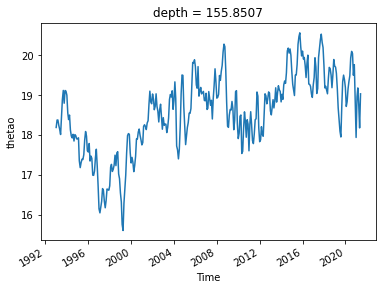

In [33]:
import matplotlib.pyplot as plt

# Agora você pode plotar normalmente
nemo['thetao'].isel(depth=0).mean(dim=['latitude', 'longitude']).plot()
plt.show()

nemo['thetao'].isel(depth=5).mean(dim=['latitude', 'longitude']).plot()
plt.show()

nemo['thetao'].isel(depth=10).mean(dim=['latitude', 'longitude']).plot()
plt.show()

nemo['thetao'].isel(depth=15).mean(dim=['latitude', 'longitude']).plot()
plt.show()

nemo['thetao'].isel(depth=20).mean(dim=['latitude', 'longitude']).plot()
plt.show()

nemo['thetao'].isel(depth=24).mean(dim=['latitude', 'longitude']).plot()
plt.show()

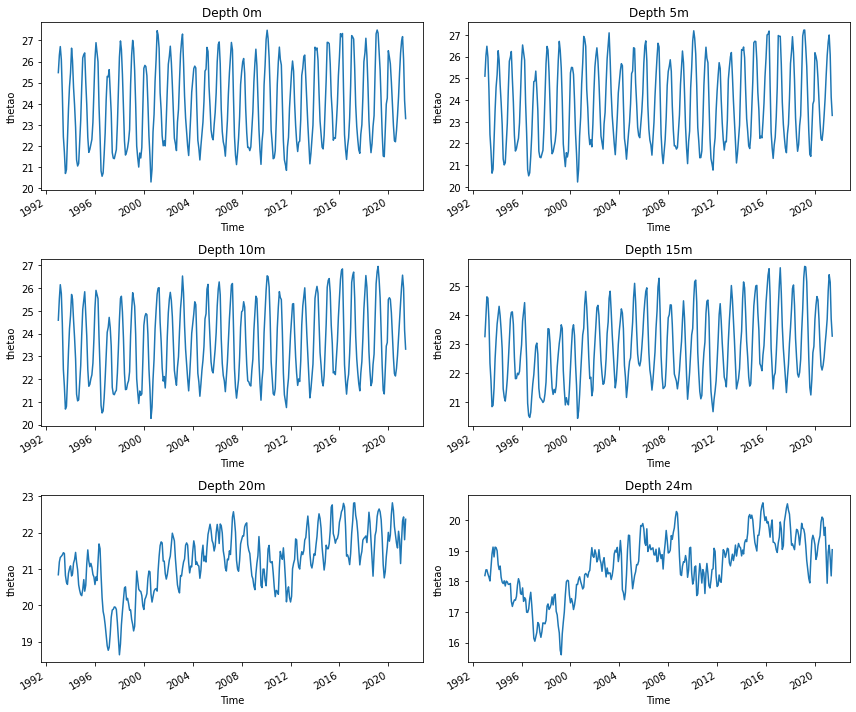

In [36]:
#import matplotlib.pyplot as plt

# Configurar a figura e os subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))

# Lista de profundidades para iterar
depths = [0, 5, 10, 15, 20, 24]

# Iterar sobre profundidades e subplots
for i, depth in enumerate(depths):
    ax = axes[i//2, i%2]  # Define a posição do subplot
    nemo['thetao'].isel(depth=depth).mean(dim=['latitude', 'longitude']).plot(ax=ax)
    ax.set_title(f'Depth {depth}m')

# Ajustar layout
plt.tight_layout()
plt.show()

6. Verificar Valores Missing (NaN)
Identifique dados faltantes:


In [23]:
print(nemo.isnull().sum())


<xarray.Dataset>
Dimensions:  ()
Data variables:
    mlotst   int64 1463760
    so       int64 41234940
    thetao   int64 41234940


## Vamos aqui plotar uma seção vertical dos dados

1.Verifique as Profundidades Disponíveis:


In [24]:
print(nemo['depth'])


<xarray.DataArray 'depth' (depth: 25)>
array([  0.494025,   1.541375,   2.645669,   3.819495,   5.078224,   6.440614,
         7.92956 ,   9.572997,  11.405   ,  13.46714 ,  15.81007 ,  18.49556 ,
        21.59882 ,  25.21141 ,  29.44473 ,  34.43415 ,  40.34405 ,  47.37369 ,
        55.76429 ,  65.80727 ,  77.85385 ,  92.32607 , 109.7293  , 130.666   ,
       155.8507  ], dtype=float32)
Coordinates:
  * depth    (depth) float32 0.494 1.541 2.646 3.819 ... 92.33 109.7 130.7 155.9
Attributes:
    standard_name:  depth
    long_name:      Depth
    units:          m
    unit_long:      Meters
    axis:           Z
    positive:       down
    valid_min:      0.494025
    valid_max:      5727.917


2. Selecionar uma Localização para a Seção:

Escolha uma latitude e longitude específicas para criar a seção vertical, neste exemplo vamos escolher as coordenadas aproximadas de arraial do cabo

In [ ]:
lat_sel = nemo['latitude'].sel(latitude=chosen_lat)
lon_sel = nemo['longitude'].sel(longitude=chosen_lon)


3. Criar a Seção Vertical:
Selecione a temperatura ao longo da profundidade para o ponto escolhido:

In [ ]:
temp_section = nemo['thetao'].sel(latitude=lat_sel, longitude=lon_sel)


4. Plotar a Seção Vertical:


In [ ]:
temp_section.plot(y='depth', yincrease=False)  # yincrease=False para mostrar profundidade crescente para baixo
plt.show()


5. Plotar uma Seção Ao Longo de uma Linha (transecto):

Se quiser criar uma seção ao longo de uma linha (por exemplo, de uma latitude para outra):

#### temp_transect = nemo['thetao'].sel(longitude=chosen_lon).mean(dim='time')
temp_transect.plot(x='latitude', y='depth', yincrease=False)
plt.show()
